# Project: Investigate "The Movie Database" (TMDB) Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project I've selected a dataset from The Movie Database (TMDB). This dataset is available through the Udacity Nanodegree program [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv). The dataset has been cleaned from the original on [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata).
>
> From the notes provided with the dataset I have the following preliminary information:
- This data set contains information for about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
  - Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe | characters.
    - Any given movie may have one or more 'genres', 'cast', 'keywords', and 'production_companies'.
  - There are some odd characters in the ‘cast’ column. I will leave them as is.
  - The final two columns ending with '\_adj' show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
  - The currency in the dataset is assumed to be in USD, as per the discussion [here](https://www.themoviedb.org/talk/58867597c3a36817620028ed). 
  - The recommendation from Kaggle is to treat 'zero' values as missing for example in the 'budget' field.
>
> In performing this analysis I've relied heavily on my previous data analysis projects, particularly the [Dataquest.io](https://www.dataquest.io) **Data Scientist in Python** path. My repository for these prior projects can be found on [Github](https://github.com/orspain/Dataquest). While there is no one project or dataset that are the same, I've applied what I've learned as applicable.
>
> **Questions**:  
>1. Which genres are most popular on an overall yearly basis?
2. What is the most common movie genre?
3. Which year had the most movie releases?
4. What were the highest grossing movies?
5. Which production companies had the most releases?
6. Which year on average was the most profitable for movies?
7. Which month had the highest average revenue?
8. What kinds of properties are associated with films that have high revenues?

### Load the necessary Python libraries

>Below, I will load the libraries needed for the analysis. I will also change the formatting for float values, so that they are more readable.

In [1]:
# Import libraries necessary for my analyis, processing, and visualization
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Truncate floating values so they don't display as scientific notation
pd.options.display.float_format = '{:20,.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

> In this section I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

> I'll use the pandas library in Python to load the csv into a dataframe, which will make it easier to work with and analyse, and then print out the first 5 rows.
>

In [3]:
# Load the data
data = pd.read_csv('tmdb-movies.csv')

In [4]:
# Print out first 5 rows
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


### Exploration, continued

> 
>I'll continue to explore the data to find out the total number of rows and columns, the names of the columns, and the number of unique values in each row - this will help me see where there might be issues to clean up later. 
>Then, I will show the data types with the info() method, and use the describe() method for an overview of basic statistical information. 
>

In [5]:
# Show the number of rows and columns
data.shape

(10866, 21)

In [6]:
# Print out the column names
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
# Print out the number of unique values in each row
data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
# Print out the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
# Show some descriptive statistics 
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00"
mean,"66,064.18",0.65,"14,625,701.09","39,823,319.79",102.07,217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25"
std,"92,130.14",1.00,"30,913,213.83","117,003,486.58",31.38,575.62,0.94,12.81,"34,306,155.72","144,632,485.04"
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"10,596.25",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,"20,669.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00
75%,"75,610.00",0.71,"15,000,000.00","24,000,000.00",111.00,145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


### Observing NaN or zero values

>I'll take a quick peek at NaN or zero values, although I won't deal with these until the Cleaning section.

In [10]:
data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# Look for NaN or zero values
# Replace column name to check other columns
null_check = data.loc[:, ['id', 'budget_adj']].sort_values(by=['budget_adj'], ascending=True)
null_check.head()

,id,budget_adj
5329,9611,0.00
3838,65256,0.00
3837,64854,0.00
3836,70574,0.00
3835,75964,0.00


In [12]:
# Look for NaN or zero values
# Replace column name to check other columns
null_check = data.loc[:, ['id', 'revenue_adj']].sort_values(by=['revenue_adj'], ascending=True)
null_check.head()

,id,revenue_adj
10865,22293,0.00
5132,5204,0.00
5129,11427,0.00
5127,41488,0.00
5126,30074,0.00


### Data Cleaning

>From our brief view of the data above, I can see that there are some null values in the 'cast', 'director', 'overview' and 'genres' columns. The information shows that these are very few, so I've chosen to drop these. I'll also drop the 'imdb_id', 'homepage', 'tagline' and 'overview' columns entirely as they're not needed for my analysis. 
>While investigating the dataset, I discovered on the [TMDB page](https://www.themoviedb.org/talk/5141d424760ee34da71431b0) that the 'popularity' field has no upper bound and is more of a cumulative score. I've decided to keep that data, if we wanted to ask meaningful questions about the movie rankings it would have to be dealt with. 
>The 'budget' and 'revenue' fields have over 50% zero values, which I'll replace with NaN as per the Kaggle recommendation. The 'runtime' column has a just a few zero values which I've chosen to drop.
>I'll modify the 'release date' column into datetime format so that I can properly answer the questions. 
>
> To sum up, here are the steps I'll take in this section:
1. Remove unused columns which aren't critical to my analysis
2. Remove duplicate rows from the dataset
3. Drop null values that represent a relatively small set.
4. Replace the zero values in the 'budget' and 'revenue' columns with NaN.
5. Drop the 'runtime' column zero values which represent a relatively small set.
6. Change the string format for 'release date' into datetime format

In [13]:
# Drop unnecessary columns
drop_col = ['imdb_id', 'homepage', 'tagline', 'overview']
data.drop(drop_col, axis=1, inplace=True)

In [14]:
# Remove the duplicate row
data.drop_duplicates(inplace = True)

In [15]:
# Drop the null values in the cast, director, and genres columns
nv = ['cast', 'director', 'genres']
data.dropna(subset=nv, how='any', inplace=True)

In [16]:
# Replace zero values in the budget and revenue columns with NaN
data['budget'] = data['budget'].replace(0, np.NaN)
data['revenue'] = data['revenue'].replace(0, np.NaN)
data['budget_adj'] = data['budget_adj'].replace(0, np.NaN)
data['revenue_adj'] = data['revenue_adj'].replace(0, np.NaN)

In [17]:
# Filter the runtime column zero values
data.query('runtime !=0', inplace=True)

In [18]:
#Change string format of release_date to datetime format.

data['release_date'] = pd.to_datetime(data['release_date'])
data['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genres are the most popular on an overall yearly basis?

In [19]:
# map the rows of genres into a list
genre_details = list(map(str,(data['genres'])))
genre = ['Adventure','Science Fiction','Fantasy','Crime','Western','Family','nan','Animation','War','Mystery','Romance','TV Movie','Action','Thriller','Comedy','Drama','History','Music','Horror','Documentary','Foreign']

# create a numpy array which contains the data for release_year and popularity columns 
year = np.array(data['release_year'])
popularity = np.array(data['popularity'])

# create a null dataframe with genres as indexes and years as columns
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))

# change all the values of the dataframe from NaN to zero
popularity_df = popularity_df.fillna(value = 0.0)

n = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[n]] = popularity_df.loc[split_genre, year[n]] + popularity[n]
    n+=1

In [20]:
#calculate the standard deviation
def calculate_std_dev(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std_dev(popularity_df)

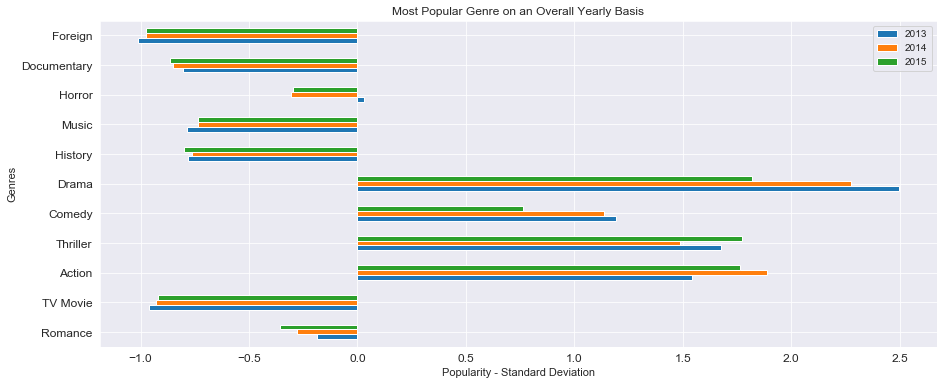

In [21]:
# plot the data
popular_genre.iloc[10:,53:].plot(kind='barh',figsize = (15,6),fontsize=12)

# set up the title and labels of the plot.
plt.title("Most Popular Genre on an Overall Yearly Basis",fontsize=12)
plt.xlabel("Popularity - Standard Deviation",fontsize=11)
plt.ylabel("Genres",fontsize = 11)
sns.set_style("whitegrid")

#### Observations: Drama is the most popular genre in recent years

>The Drama genre appears to have slipped in popularity relative to 2013. However I should keep in mind that the genres are applied liberally. Also I don't have a measurement of consistency for the popularity data. 

### Research Question 2: What is the most common movie genre?

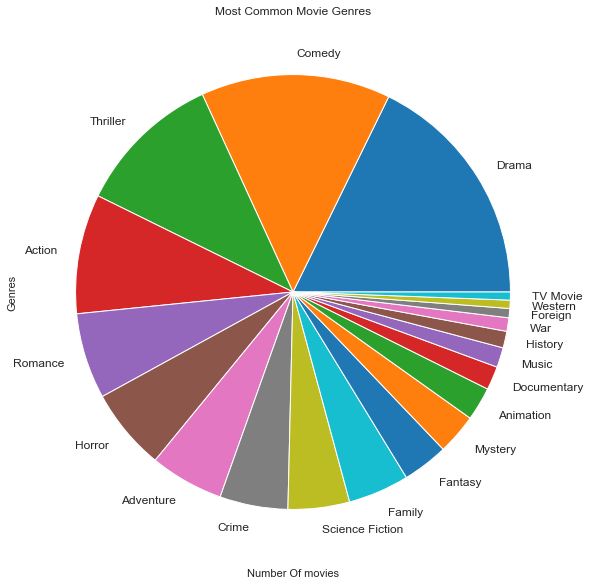

In [26]:
# Function to split a string and return the count of each item
def count_item(x):
    #strip the pipe character
    data_plot = data[x].str.cat(sep = '|')
    clean = pd.Series(data_plot.split('|'))
    #return the count of each item.
    counted = clean.value_counts(ascending=False)
    return counted

# call the function to count the movies of each genre
total_genre_movies = count_item('genres')

# plot a 'barh' plot
total_genre_movies.plot(kind= 'pie',figsize = (18,10),fontsize=12)

# set the title and the labels of the plot
plt.title("Most Common Movie Genres",fontsize=12)
plt.xlabel('Number Of movies',fontsize=11)
plt.ylabel("Genres",fontsize= 11)
sns.set_style("darkgrid")

#### Observations: What is Drama, anyway?

>The resulting graph shows that Drama is most common genre. Since any movie may have a number of genres, and Drama can be very broadly interpreted, it makes sense that it appears first in the ranking. 

### Research Question 3: Which year had the most movie releases?

release_year
2011    529
2012    572
2013    644
2014    680
2015    610
Name: id, dtype: int64


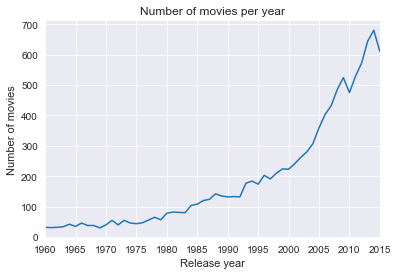

In [27]:
# group movies for each year & count
movie_group=data.groupby('release_year').count()['id']
print(movie_group.tail())

# Biuld the graph
data.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Number of movies per year",fontsize = 12)
plt.xlabel('Release year',fontsize = 11)
plt.ylabel('Number of movies',fontsize = 11)
#set the style sheet
sns.set_style("darkgrid")

#### Observations: The number of releases is skewed towards recent years

>I can state that for the given data sample, 2014 had the most releases.
>However I'd require further data to make an accurate model based on a population of all movies. Since our internet data is fairly recent and is limited to a specific audience, I suspect that there is some deviation in the resulting accuracy.
>In other words, it's likely that TMDB has more recent movies which skews that data. 

### Research Question 4: What were the highest grossing movies?

In [28]:
# calculate profit for each movie
# add a new column in the dataframe named 'gross_profit'
data['gross_profit'] = data['revenue'] - data['budget']

# add a new column for adjusted profit
data['profit_adj'] = data['revenue_adj'] - data['budget_adj']

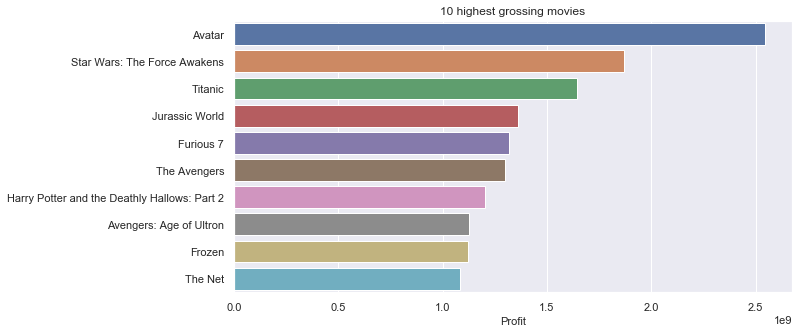

In [29]:
# sort the 'gross_profit' column in decending order and store it
sorted_profit = pd.DataFrame(data['gross_profit'].sort_values(ascending = False))
sorted_profit['original_title'] = data['original_title']
mapped = list(map(str,(sorted_profit['original_title'])))
x = list(mapped[:10])
y = list(sorted_profit['gross_profit'][:10])

# plot the top 10 movies with the highest profit
ax = sns.barplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("10 highest grossing movies",fontsize = 12)
ax.set_xlabel("Profit",fontsize = 11)
sns.set_style("darkgrid")

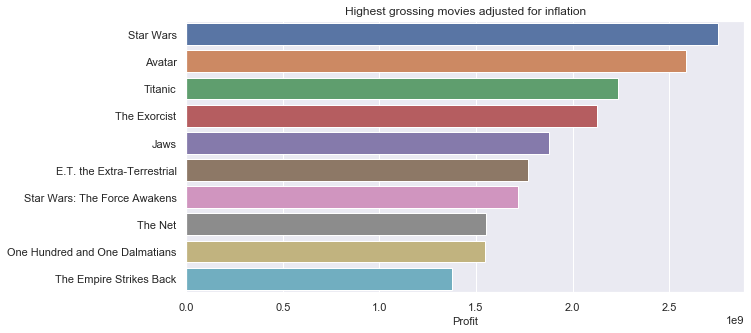

In [30]:
# sort the 'profit_adj' column in decending order and store it
sorted_profit_adj = pd.DataFrame(data['profit_adj'].sort_values(ascending = False))
sorted_profit_adj['original_title'] = data['original_title']
mapped2 = list(map(str,(sorted_profit_adj['original_title'])))
x = list(mapped2[:10])
y = list(sorted_profit_adj['profit_adj'][:10])

# plot the top 10 movies with the highest profit
ax = sns.barplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Highest grossing movies adjusted for inflation",fontsize = 12)
ax.set_xlabel("Profit",fontsize = 11)
sns.set_style("darkgrid")

#### Observations: Star Wars for the win

>Taking into account inflation, the profit picture changes considerably, although Avatar, Titanic, and The Net appear in both lists.

### Research Question 5: Which production companies had the most releases?

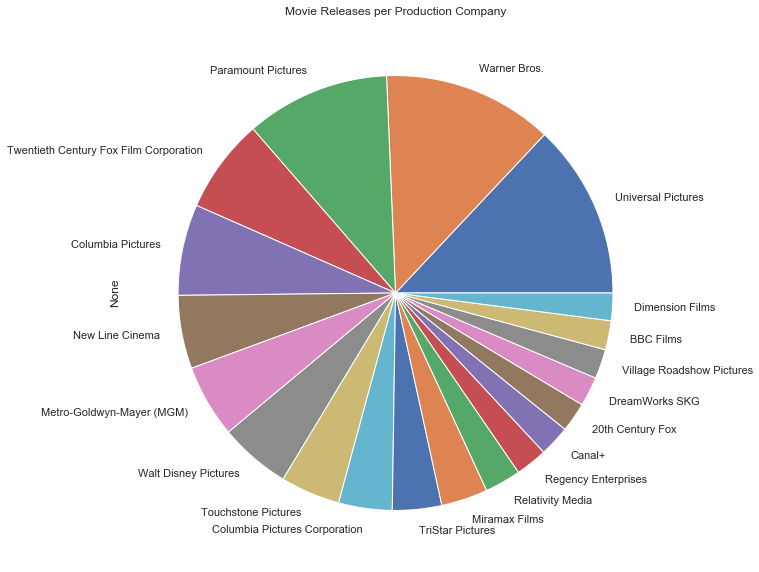

In [34]:
# use the 'count_item' function 
production_companies = count_item('production_companies')

# plot the results
production_companies.iloc[:20].plot(kind='pie',figsize=(16,10),fontsize=11)
plt.title("Movie Releases per Production Company",fontsize=12)
sns.set_style("darkgrid")

### Research Question 6: Which year on average was the most profitable for movie releases?

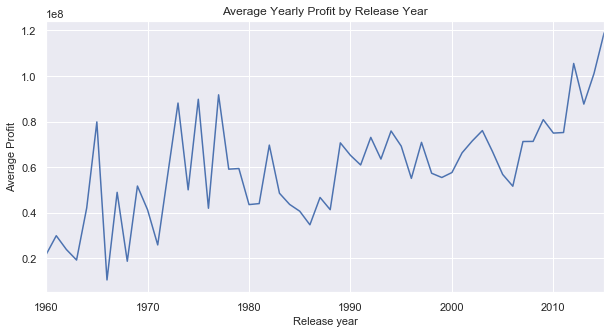

In [38]:
# plot the most profitable year on average
data.groupby('release_year')['gross_profit'].mean().plot()

#set up the title and labels of the graph.
plt.title("Average Yearly Profit by Release Year",fontsize = 12)
plt.xlabel('Release year',fontsize = 11)
plt.ylabel('Average Profit',fontsize = 11)

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid")

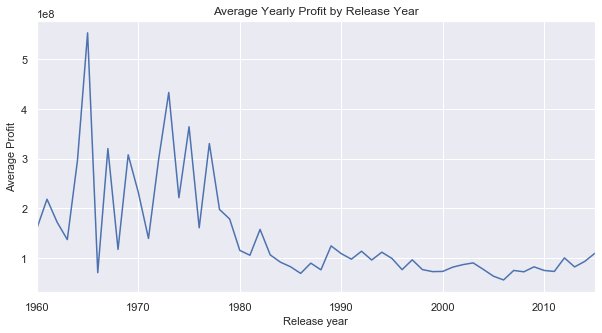

In [39]:
data.groupby('release_year')['profit_adj'].mean().plot()

#set up the title and labels of the graph.
plt.title("Average Yearly Profit by Release Year",fontsize = 12)
plt.xlabel('Release year',fontsize = 11)
plt.ylabel('Average Profit',fontsize = 11)

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid")

#### Observations: Production costs going up?

>The data shows again that accounting for inflation we see some substantial shift. Although I can't really say with certainty, it might be partially atributed to higher production costs. I would need to do some further analysis and find possible outliers. 
>It's difficult to reach any conclusion about a specific profitable year however. Perhaps it would be more useful to replant the question from a different angle. 

### Research Question 7: Which month had the highest average revenue?

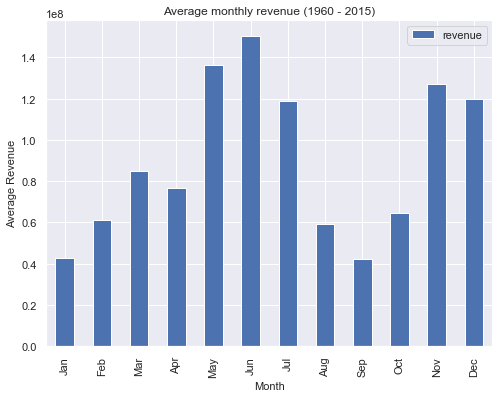

In [42]:
# which month had the highest average revenue?
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# extract the month number from the release date
month_released = data['release_date'].dt.month
month_released = pd.DataFrame(month_released)

# change the column name of the new dataframe 'month_release'
month_released.rename(columns = {'release_date':'release_month'},inplace=True)

# add a new column 'revenue' in the dataframe 'month_release'
month_released['revenue'] = data['revenue']

# calculate the mean revenue of each month
mean_revenue  = month_released.groupby('release_month').mean()
mean_revenue['month'] = months

# plot the graph
mean_revenue.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

# set up the title and lables of the plot
plt.title('Average monthly revenue (1960 - 2015)',fontsize = 12)
plt.xlabel('Month',fontsize = 11)
plt.ylabel('Average Revenue',fontsize = 11)
sns.set_style("darkgrid")

#### Observations: June is the best month for revenue

### Research Question 8: What kinds of properties are associated with films that have high revenues?

>To answer this question I will use a simple heatmap which shows correlations between some of the columns.

In [43]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

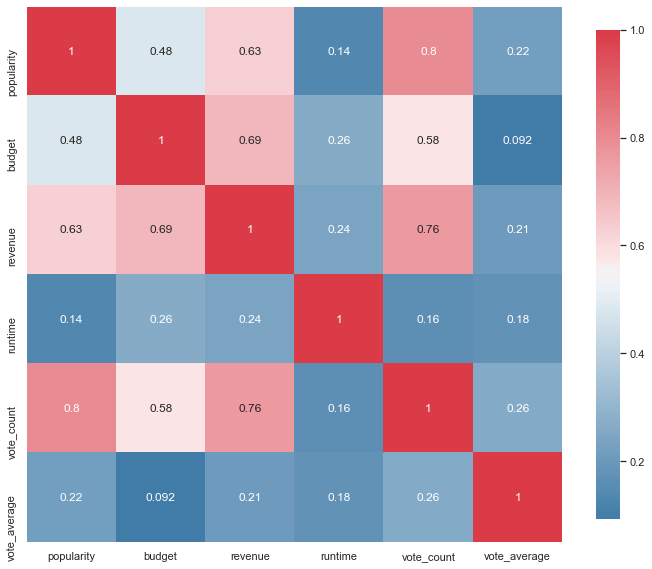

In [44]:
plot_correlation_map(data[['popularity','budget','revenue','runtime','vote_count','vote_average']])

#### Observations:

>Revenue has a weak positive correlation with budget. This makes sense as a movie with a higher budget will be more likely to have some success. I'd need to look at cast more closely, but it might be true that with a higher budget a movie is more likely to have actors which boost popularity and thus revenue.
>Popularity and vote_count are also positively correlated with revenue. If more viewers have seen the movie and felt positive about it, then this makes sense.
>

<a id='conclusions'></a>
## Conclusions

>The TMBD dataset has a substantial amount of information. I was able to see that:
- Drama is the most common and the most popular movie genre, however this genre is fairly broad in definition.
- Recent movie releases are more represented, this may reflect the addition of data on the TMDB site rather than an accurate depiction of the number of movies released. 
- The highest grossing movie in the dataset is Star Wars, taking into account inflation.
- Universal Pictures has the most releases in this dataset.
- June was the month for highest revenue. 
- Some of the values can be correlated positively with revenue, such as budget. 
>
>A significant limitation is that this data is that some of the values, such as 'popularity' and 'votes', are subjective and dependent on visitors to the website. 
>Another limitation is the null and zero values in some features. Missing or ambiguous values hinder the analysis and require quite a bit of thought and planning. 

## References

- [Udacity Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002)
- [Kaggle TMDB Data](https://www.kaggle.com/tmdb/tmdb-movie-metadata)
- [TMDB forum](https://www.themoviedb.org/talk/)
- [My own Github repository with other Data Science projects](https://github.com/orspain/Dataquest)